In [4]:
 # Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [ ]:
##Whale Returns
#Read the Whale Portfolio daily returns and clean the data

In [17]:
# Reading whale returns
whale_returns = pd.read_csv('whale_returns.csv', index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_returns = whale_returns.sort_index()


In [18]:
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [7]:
#(might need to check headers first if multiple columns)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [13]:
# Count nulls
whale_returns.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [9]:
#determine number of nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [19]:
#percent null
whale_returns.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [20]:
# Drop nulls
# drop whole record with an na
whale_returns = whale_returns.dropna()

In [25]:
whale_returns.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.0
PAULSON & CO.INC.              0.0
TIGER GLOBAL MANAGEMENT LLC    0.0
BERKSHIRE HATHAWAY INC         0.0
dtype: float64

In [24]:
for col in whale_returns.columns:
    print(col)

SOROS FUND MANAGEMENT LLC
PAULSON & CO.INC. 
TIGER GLOBAL MANAGEMENT LLC
BERKSHIRE HATHAWAY INC


In [27]:
#??resolve data quality, cleanse nulls from dataframe by filling no
#whale_returns['SOROS_FUND_MANAGEMENT_LLC'] = whale_returns['SOROS_FUND_MANAGEMENT_LLC'].fillna('no')
#whale_returns['PAULSON_&_CO.INC.'] = whale_returns['PAULSON_&_CO.INC.'].fillna('no')
#whale_returns['TIGER_GLOBAL_MANAGEMENT_LLC'] = whale_returns['TIGER_GLOBAL_MANAGEMENT_LLC'].fillna('no')
#whale_returns['BERKSHIRE_HATHAWAY_INC'] = whale_returns['BERKSHIRE_HATHAWAY_INC'].fillna('no')

In [ ]:
 ##Algorithmic Daily Returns
#Read the algorithmic daily returns and clean the data


In [28]:
# Reading algorithmic returns
algo_returns = pd.read_csv('algo_returns.csv', index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_returns = algo_returns.sort_index()
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [30]:
#(might need to check headers first if multiple columns)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [29]:
# Count nulls
algo_returns.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [31]:
#determine number of nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [32]:
# nulls as a percent
algo_returns.isnull().mean() * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [33]:
# Drop nulls
#drop whole record with an na
algo_returns = algo_returns.dropna()

In [34]:
algo_returns.isnull()

,Algo 1,Algo 2
Date,,
2014-06-05,False,False
2014-06-06,False,False
2014-06-09,False,False
2014-06-10,False,False
2014-06-11,False,False
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [ ]:
##S&P 500 Returns
#Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data.

In [35]:
# Reading S&P 500 Closing Prices
sp500_history = pd.read_csv('sp500_history.csv', index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500_history = sp500_history.sort_index()
sp500_history

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [51]:
 # Check Data Types
   
sp500_history.dtypes

Close    float64
dtype: object

In [47]:
sp500_history.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [46]:
# Fix Data Types (?????)
# (my notes - need to change object to float....)
# it's the dollar sign... need to drop the dollar sign from the column named "close"
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")

C:\Users\16177\NewAnaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [50]:
# change from object to float???
sp500_history["Close"] = sp500_history["Close"].astype("float")

In [53]:
 # Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()

In [54]:
sp500_daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [57]:
sp500_daily_returns.isnull()

,Close
Date,
2012-10-02,False
2012-10-03,False
2012-10-04,False
2012-10-05,False
2012-10-08,False
...,...
2019-04-16,False
2019-04-17,False
2019-04-18,False


In [56]:
# Drop nulls

sp500_daily_returns = sp500_daily_returns.dropna()


In [58]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns={'Close':'Returns'}, inplace=True)

C:\Users\16177\NewAnaconda3\envs\alpacaenv\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [59]:
sp500_daily_returns

,Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [60]:
## Combine Whale, Algorithmic, and S&P 500 Returns
## Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([sp500_daily_returns, algo_returns, whale_returns], axis="columns", join="inner")

combined_returns.head()

,Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652


In [ ]:
## Conduct Quantitative Analysis
#In this section, you will calculate and visualize performance and risk metrics for the portfolios.

In [ ]:
## Performance Anlysis


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

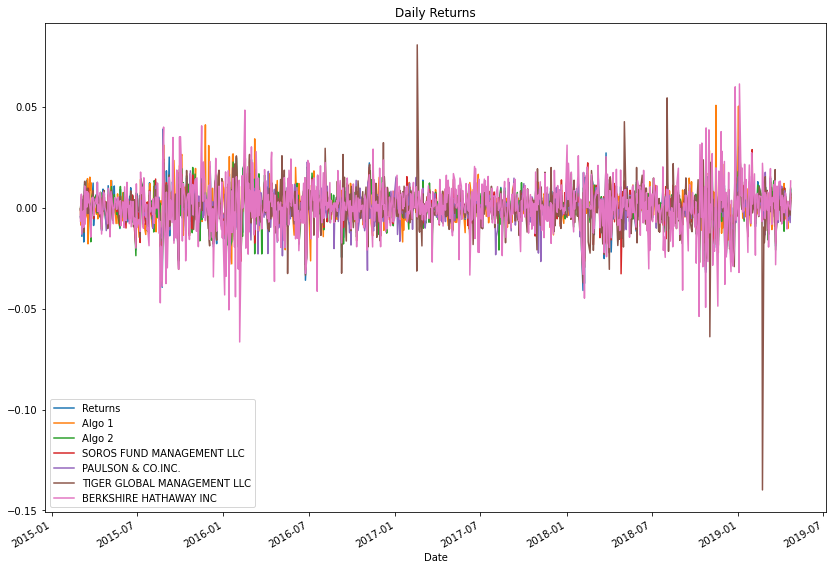

In [61]:
##Calculate and Plot the daily returns.
# Plot daily returns of all portfolios
combined_returns.plot(title='Daily Returns', figsize=(14, 10))

In [ ]:
##Calculate and Plot cumulative returns.

In [62]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod()

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

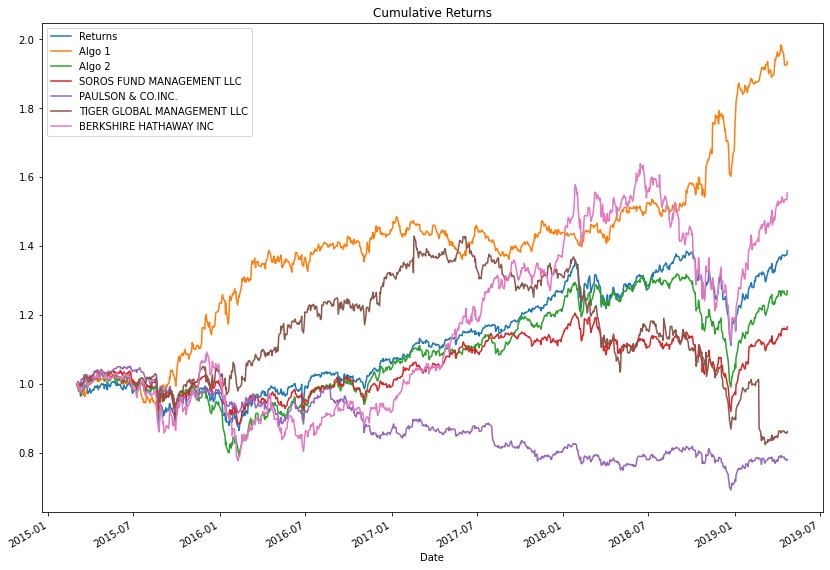

In [63]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(14, 10), title='Cumulative Returns')

In [14]:
# Create a box plot for each portfolio

In [16]:
# Box plot to visually show risk sp500_daily_returns

In [ ]:
# Box plot to visually show risk algo_returns

In [ ]:
# Box plot to visually show risk whale_returns

In [ ]:
## Calculate Standard Deviations

In [ ]:
# Calculate the daily standard deviations of sp500_daily_returns

In [ ]:
# Calculate the daily standard deviations of algo_returns

In [ ]:
# Calculate the daily standard deviations of whale_returns

In [ ]:
##Determine which portfolios are riskier than the S&P 500

In [ ]:
# Calculate  the daily standard deviation of S&P 500

In [ ]:
# Determine which portfolios are riskier than the S&P 500

In [ ]:
## Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized standard deviation (252 trading days)

In [ ]:
##Rolling Statistics

In [15]:
## Calculate and plot rolling std for all portfolios with 21-day window

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

In [ ]:
# Plot the rolling standard deviation

In [ ]:
##Calculate and plot the correlation

In [ ]:
# Calculate the correlation

In [ ]:
# Display de correlation matrix

In [ ]:
## Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [ ]:
# Calculate covariance of a single portfolio

In [ ]:
# Calculate variance of S&P 500

In [ ]:
# Computing beta

In [ ]:
# Plot beta trend

In [ ]:
## Rolling Statistics Challenge: Exponentially Weighted Average

In [ ]:
# Use `ewm` to calculate the rolling window (ewm with a 21-day half-life.)

In [ ]:
##Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios

In [ ]:
# Visualize the sharpe ratios as a bar plot

In [ ]:
#Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [ ]:
## Create Custom Portfolio

In [ ]:
##  Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# pick three stocks (GME, MSTR, GS)

In [ ]:
# Reading data from GME

In [ ]:
# Reading data from MSTR

In [ ]:
# Reading data from GS

In [ ]:
# Combine all stocks in a single DataFrame

In [ ]:
# Reset Date index

In [ ]:
 # Reorganize portfolio data by having a column per symbol

In [ ]:
 # Calculate daily returns

In [ ]:
# Drop NAs

In [ ]:
# Display sample data

In [ ]:
##  Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

In [ ]:
# Calculate portfolio return

In [ ]:
# Display sample data

In [ ]:
## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
 # Join your returns DataFrame to the original returns DataFrame

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

In [ ]:
## Re-run the risk analysis with your portfolio to see how it compares to the others

In [ ]:
##  Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`

In [ ]:
## Calculate and plot rolling std with 21-day window

In [ ]:
# Calculate rolling standard deviation

In [ ]:
# Plot rolling standard deviation

In [ ]:
## Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation

In [ ]:
##Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta

In [ ]:
## Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios

In [ ]:
# Visualize the sharpe ratios as a bar plot

In [ ]:
#  How does your portfolio do?